#  Ph√¢n t√≠ch v√† Ph√¢n c·ª•m D·ªØ li·ªáu Sinh vi√™n

**M·ª•c ti√™u:** √Åp d·ª•ng c√°c ph∆∞∆°ng ph√°p ph√¢n t√≠ch v√† thu·∫≠t to√°n ph√¢n c·ª•m ƒë·ªÉ ph√°t hi·ªán nh√≥m ƒë·∫∑c tr∆∞ng trong t·∫≠p d·ªØ li·ªáu sinh vi√™n d·ª±a tr√™n k·∫øt qu·∫£ h·ªçc t·∫≠p v√† h√†nh vi h·ªçc.

**B·ªô d·ªØ li·ªáu:** Student_Performance.csv (bao g·ªìm ƒëi·ªÉm s·ªë, th·ªùi gian h·ªçc, ho·∫°t ƒë·ªông ngo·∫°i kh√≥a, v.v.)


## A. L√†m s·∫°ch d·ªØ li·ªáu

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# ƒê·ªçc d·ªØ li·ªáu
df = pd.read_csv('Student_Performance.csv')
df.head()



Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0

### Ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu
- ƒê∆∞a c·ªôt `Extracurricular Activities` v·ªÅ d·∫°ng (0/1) ƒë·ªÉ th·ª±c hi·ªán chu·∫©n h√≥a v√† ph√¢n c·ª•m.

In [74]:
dftrainWithoutPerform = df.copy(deep= True)
dftrain = df.copy(deep= True)
dftrain['Extracurricular Activities'] = dftrain['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
dftrainWithoutPerform ['Extracurricular Activities'] = dftrainWithoutPerform['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
dftrainWithoutPerform = dftrainWithoutPerform.drop(columns=['Performance Index'])
dftrainWithoutPerform.head(10)

Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               99                           1            9   
1              4               82                           0            4   
2              8               51                           1            7   
3              5               52                           1            5   
4              7               75                           0            8   
5              3               78                           0            9   
6              7               73                           1            5   
7              8               45                           1            4   
8              5               77                           0            8   
9              4               89                           0            4   

   Sample Question Papers Practiced  
0                                 1  
1                                 2  
2                                 2  
3                                 2  
4                                 5  
5                                 6  
6                                 6  
7                                 6  
8                                 2  
9                                 0

### 1. Xem th√¥ng tin t·ªïng quan, lo·∫°i d·ªØ li·ªáu v√† ph√¢n ph·ªëi t·ª´ng c·ªôt


- xem th√¥ng tin t·ªïng quan, lo·∫°i d·ªØ li·ªáu v√† ph√¢n ph·ªëi t·ª´ng c·ªôt.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


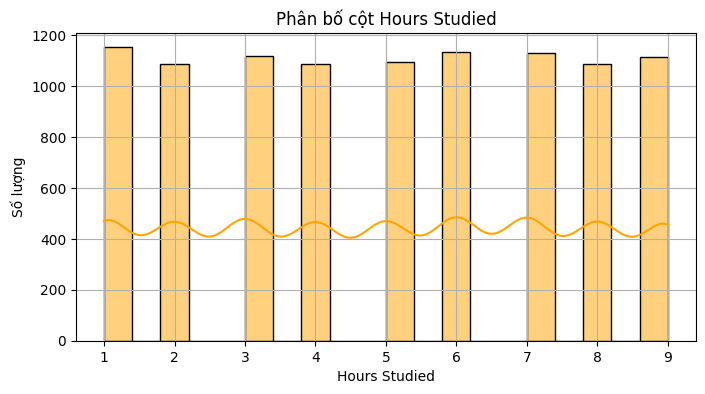

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


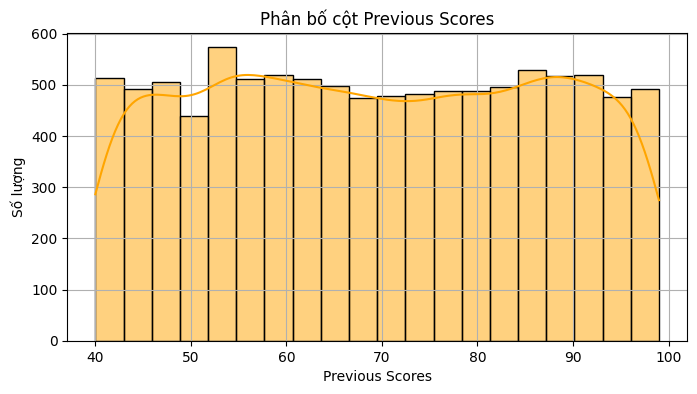

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


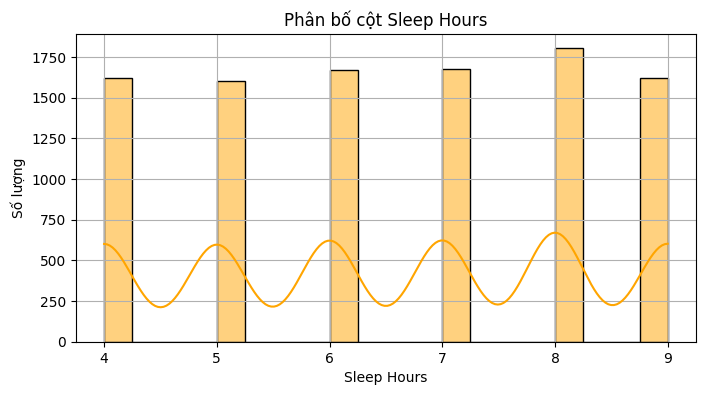

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


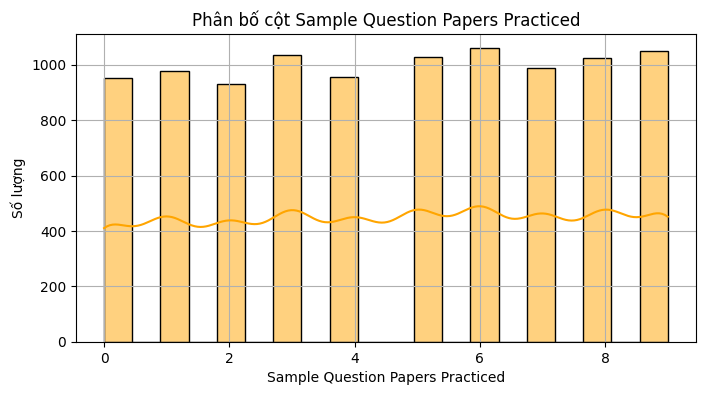

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


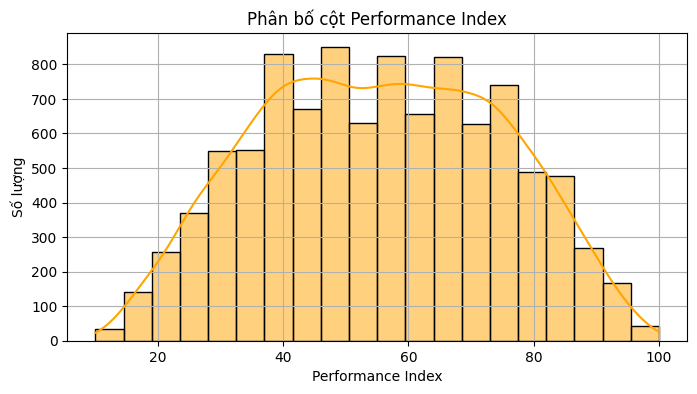

In [75]:
df.info()
df.describe()
df.isnull().sum()

# Ph√¢n ph·ªëi d·ªØ li·ªáu
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# V·∫Ω bi·ªÉu ƒë·ªì ph√¢n ph·ªëi cho t·ª´ng c·ªôt s·ªë
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, kde=True, bins=20, color="orange", edgecolor="black")
    plt.title(f"Ph√¢n b·ªë c·ªôt {col}")
    plt.xlabel(col)
    plt.ylabel("S·ªë l∆∞·ª£ng")
    plt.grid(True)
    plt.show()



#### Ph√¢n t√≠ch qua bi·ªÉu ƒë·ªì v√† m√¥ t·∫£ c·ªßa d·ªØ li·ªáu
- D·ª±a v√†o k·∫øt qu·∫£ m√¥ t·∫£ v√† thu·∫≠t to√°n, c√≥ th·ªÉ th·∫•y kh√¥ng c√≥ c·ªôt n√†o b·ªã khuy·∫øt d·ªØ li·ªáu.
- c·ªôt `Extracurricular Activities` ƒëang ·ªü d·∫°ng text (Yes/No) => n√™n s·∫Ω c·∫ßn ƒë∆∞a v·ªÅ d·∫°ng (1/0) ƒë·ªÉ c√≥ th·ªÉ th·ª±c hi·ªán thu·∫≠t to√°n ph√¢n c·ª•m.
- D·ª±a v√†o ph√¢n ph·ªëi c√≥ th·ªÉ th·∫•y c√°c c·ªôt c√≥ ph√¢n b·ªë kh√° ƒë·ªìng ƒë·ªÅu v·∫ø s·ªë l∆∞·ª£ng m·ªói gi√° tr·ªã, ri√™ng c·ªôt `Performance Index` th√¨ c√≥ ph·∫ßn ph·ªëi g·∫ßn v·ªõi ph√¢n b·ªë chu·∫©n.

### 2. ki·ªÉm tra c√°c gi√° tr·ªã kh√¥ng h·ª£p l·ªá

In [76]:
def classify_value(v):
    if pd.isna(v):
        return "missing"
    try:
        float(v)
        return "numeric"
    except (ValueError, TypeError):
        return "text"

report = {}
for col in df.columns:
    types = df[col].apply(classify_value)         
    majority_type = types.mode().iat[0]             
    invalid_count = (types != majority_type).sum()
    
    report[col] = {
        "invalid_count": invalid_count,
        "total_rows": len(df),
        "percent": round(invalid_count / len(df) * 100, 2),
        "majority_type": majority_type
    }

summary = (
    pd.DataFrame(report).T.reset_index()
      .rename(columns={'index': 'column'})
      .sort_values("invalid_count", ascending=False)
)

from IPython.display import display
print(" B√°o c√°o c√°c gi√° tr·ªã kh√¥ng ƒë√∫ng ƒë·ªãnh d·∫°ng ")
display(summary)

 B√°o c√°o c√°c gi√° tr·ªã kh√¥ng ƒë√∫ng ƒë·ªãnh d·∫°ng 


column invalid_count total_rows percent  \
0                     Hours Studied             0      10000     0.0   
1                   Previous Scores             0      10000     0.0   
2        Extracurricular Activities             0      10000     0.0   
3                       Sleep Hours             0      10000     0.0   
4  Sample Question Papers Practiced             0      10000     0.0   
5                 Performance Index             0      10000     0.0   

  majority_type  
0       numeric  
1       numeric  
2          text  
3       numeric  
4       numeric  
5       numeric

#### ƒë√°nh gi√°
- d·ª±a v√†o b√°o c√°o ta th·∫•y d·ªØ li·ªáu kh√¥ng ch∆∞a c√°c gi√° tr·ªã kh√¥ng h·ª£p l·ªá.

### 3. Xem x√©t h·ªá s·ªë t∆∞∆°ng quan gi·ªØa c√°c c·ªôt

<Axes: >

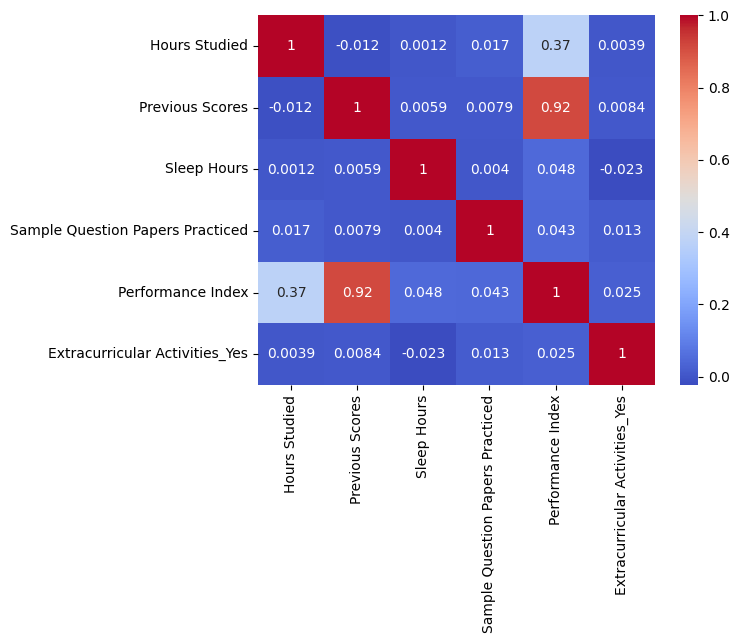

In [77]:
df_encoded = pd.get_dummies(df, drop_first=True) 
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')

#### Ph√¢n t√≠ch
- d·ª±a v√†o bi·ªÉu ƒë·ªì th√¨ c·ªôt `Performance Index` v√† c·ªôt `Previous Scores` c√≥ h·ªá s·ªë t∆∞∆°ng quan m·∫°nh (r= 0.92), khi·∫øn c·ª•m b·ªã k√©o theo c√πng m·ªôt h∆∞·ªõng c√≥ th·ªÉ ·∫£nh h∆∞·ªõng ƒë·∫øn k·∫øt qu·∫£ c·ªßa ph√¢n c·ª•m => gi·∫£i ph√°p l√† th·ª≠ tr∆∞·ªùng h·ª£p b·ªè 1 trong 2 c·ªôt ho·∫∑c kh√¥ng b·ªè r·ªìi so s√°nh k·∫øt qu·∫£ ƒë·ªÉ ƒëem l·∫°i m·ªôt k·∫øt qu·∫£ t·ªët nh·∫•t.
- c·ªôt `Performance Index` v√† c·ªôt `Hours Studied` c√≥ h·ªá s·ªë t∆∞∆°ng quan v·ª´a ph·∫£i(r = 0.37).

### 4. ki·ªÉm tra gi√° tr·ªã outlier


- Ph∆∞∆°ng ph√°p IQR v√† boxplot

In [78]:
numerical_columns = ['Hours Studied', 'Previous Scores', 'Sleep Hours',
                     'Sample Question Papers Practiced', 'Performance Index']

# H√†m ph√°t hi·ªán outlier theo IQR
def detect_outliers_iqr(df, columns):
    results = []
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        results.append({
            "C·ªôt": col,
            "S·ªë l∆∞·ª£ng ngo·∫°i l·ªá": len(outliers),
            "T·ªâ l·ªá (%)": round(len(outliers)/len(df)*100, 2),
            "Ng∆∞·ª°ng d∆∞·ªõi": round(lower_bound, 2),
            "Ng∆∞·ª°ng tr√™n": round(upper_bound, 2)
        })
    return pd.DataFrame(results)

# G·ªçi h√†m v√† in k·∫øt qu·∫£
outlier_summary = detect_outliers_iqr(df, numerical_columns)
print(outlier_summary)


                                C·ªôt  S·ªë l∆∞·ª£ng ngo·∫°i l·ªá  T·ªâ l·ªá (%)  \
0                     Hours Studied                  0        0.0   
1                   Previous Scores                  0        0.0   
2                       Sleep Hours                  0        0.0   
3  Sample Question Papers Practiced                  0        0.0   
4                 Performance Index                  0        0.0   

   Ng∆∞·ª°ng d∆∞·ªõi  Ng∆∞·ª°ng tr√™n  
0         -3.0         13.0  
1          7.5        131.5  
2          0.5         12.5  
3         -5.5         14.5  
4         -6.5        117.5  


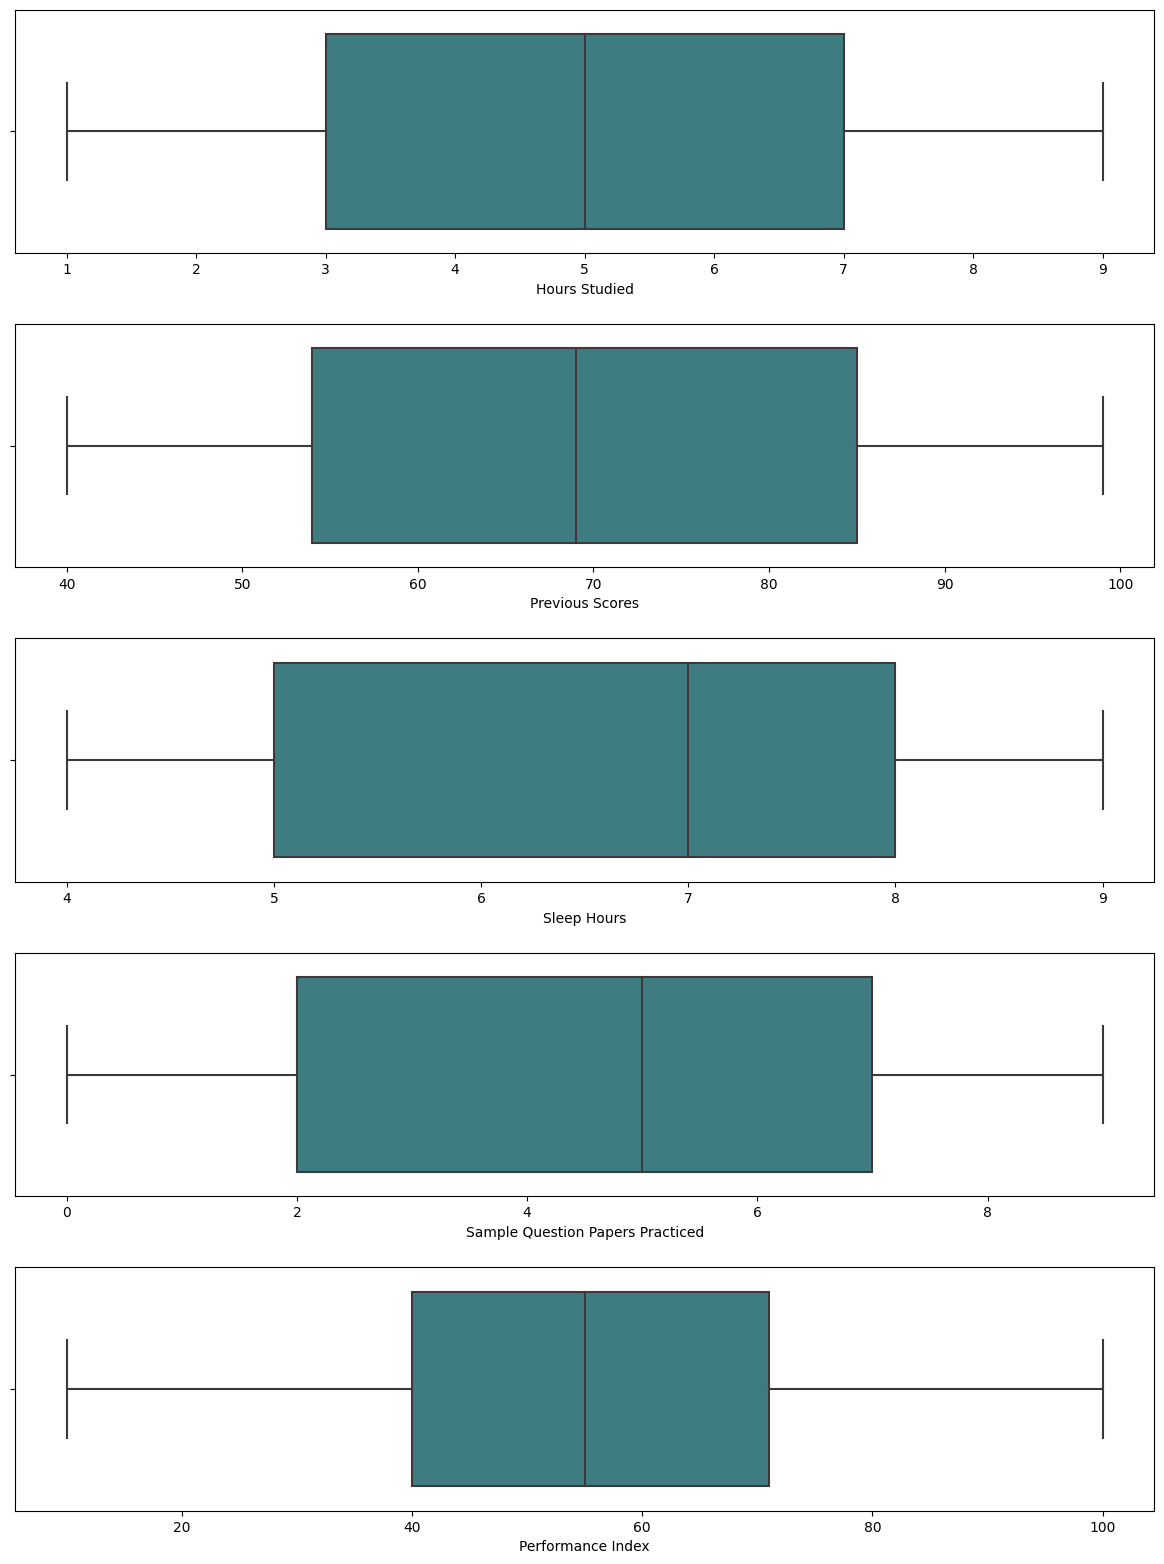

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load d·ªØ li·ªáu

# T·∫°o boxplot ƒë·ªÉ ph√°t hi·ªán outlier cho t·ª´ng c·ªôt
fig, axes = plt.subplots(5, 1, figsize=(12, 16), sharex=False, sharey=False)

sns.boxplot(x='Hours Studied', data=dftrain, palette='crest', ax=axes[0])
sns.boxplot(x='Previous Scores', data=dftrain, palette='crest', ax=axes[1])
sns.boxplot(x='Sleep Hours', data=dftrain, palette='crest', ax=axes[2])
sns.boxplot(x='Sample Question Papers Practiced', data=dftrain, palette='crest', ax=axes[3])
sns.boxplot(x='Performance Index', data=dftrain, palette='crest', ax=axes[4])

plt.tight_layout(pad=2.0)
plt.show()


#### Ph√¢n t√≠ch
- c√≥ th·ªÉ th·∫•y r·∫±ng kh√¥ng c·ªôt n√†o c√≥ gi√° tr·ªã outlier.

### 5. ƒê√°nh gi√° chung sau khi ph√¢n t√≠ch d·ªØ li·ªáu.
- D·ªØ li·ªáu kh√° l√† ƒë·∫πp v√† s·∫°ch, c√≥ ph√¢n b·ªë ph√π h·ª£p, kh√¥ng c·∫ßn ph·∫£i can thi·ªáp l√†m s·∫°ch d·ªØ li·ªáu.
- M·ªôt v√†i v·∫•n ƒë·ªÅ: 
    - d·ª±a v√†o bi·ªÉu ƒë·ªì th√¨ c·ªôt `Performance Index` v√† c·ªôt `Previous Scores` c√≥ h·ªá s·ªë t∆∞∆°ng quan m·∫°nh (r= 0.92), khi·∫øn c·ª•m b·ªã k√©o theo c√πng m·ªôt h∆∞·ªõng c√≥ th·ªÉ ·∫£nh h∆∞·ªõng ƒë·∫øn k·∫øt qu·∫£ c·ªßa ph√¢n c·ª•m c·∫ßn xem x√©t, ch·∫°y hai tr∆∞·ªùng h·ª£p v·ªõi vi·ªác gi·ªØa nguy√™n ho·∫∑c x√≥a ƒëi 1 trong 2 c·ªôt, r·ªìi r√∫t ra k·∫øt qu·∫£ t·ªët nh·∫•t.
- V√¨ d·ªØ li·ªáu kh√¥ng c√≥ gi√° tr·ªã outlier ph√¢n b·ªë ƒë·∫πp, n√™n thu·∫≠t to√°n Kmean s·∫Ω ph√π h·ª£p v·ªõi vi·ªác ph√¢n c·ª•m v·ªõi b·ªô d·ªØ li·ªáu n√†y.


## B. Ph√¢n c·ª•m d·ªØ li·ªáu

### 2. Chu·∫©n h√≥a d·ªØ li·ªáu
- v√¨ d·ªØ li·ªáu kh√¥ng c√≥ outlier n√™n ph∆∞∆°ng ph√°p chu·∫©n h√≥a `MinMaxScaler` v√¨ n√≥ d√πng gi√° tr·ªã nh·ªè nh·∫•t v√† gi√° tr·ªã l·ªõn nh·∫•t ƒë·ªÉ ƒë∆∞a d·ªØ li·ªáu v·ªÅ m·ªôt kho·∫£ng nh·∫•t ƒëinh, v√¨ th·∫ø n√≥ gi·ªØ nguy√™n ƒë∆∞·ª£c quan h·ªá t∆∞∆°ng ƒë·ªëi gi·ªØa c√°c ƒëi·ªÉm d·ªØ li·ªáu.

#### C√¥ng th·ª©c chu·∫©n h√≥a Min-Max:

$$
X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}}
$$


In [80]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
data_scaled_minmax = minmax.fit_transform(dftrain)
dataWithout_Perform_minmax = minmax.fit_transform(dftrainWithoutPerform)
data_scaled_minmax.shape


(10000, 6)

### Chu·∫©n h√≥a b·∫±ng Z-Score

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled_std = scaler.fit_transform(dftrain)
datawithout_perform_std = scaler.fit_transform(dftrainWithoutPerform)
data_scaled_std.shape


(10000, 6)

In [82]:
data_scaled = data_scaled_std

### 3. S·ª≠ d·ª•ng ph∆∞∆°ng ph√°p K-Mean ƒë·ªÉ ph√¢n c·ª•m.

#### 3.1 X√°c ƒë·ªãnh s·ªë l∆∞·ª£ng c·ª•m t·ªëi ∆∞u b·∫±ng Elbow 

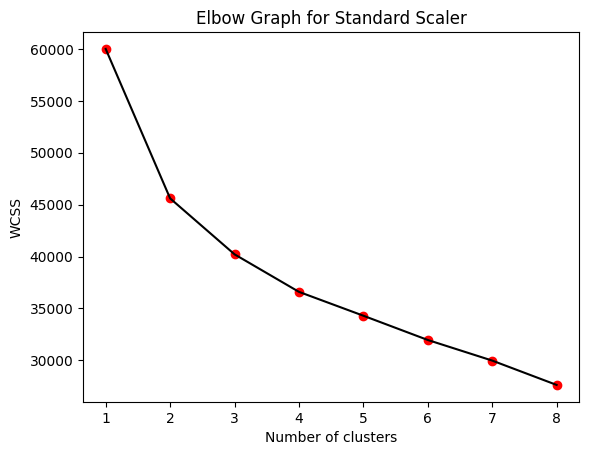

In [83]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Ph∆∞∆°ng ph√°p Elbow ƒë·ªÉ x√°c ƒë·ªãnh s·ªë c·ª•m t·ªëi ∆∞u
wcss=[]
for i in range(1,9):
    kmeans = KMeans(n_clusters=i,random_state=2)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### 3.2 Silhouette Score 

In [84]:
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(data_scaled)
    clusters_inertia.append(KM_est.inertia_)  # data for the elbow method
    silhouette_avg = silhouette_score(data_scaled, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


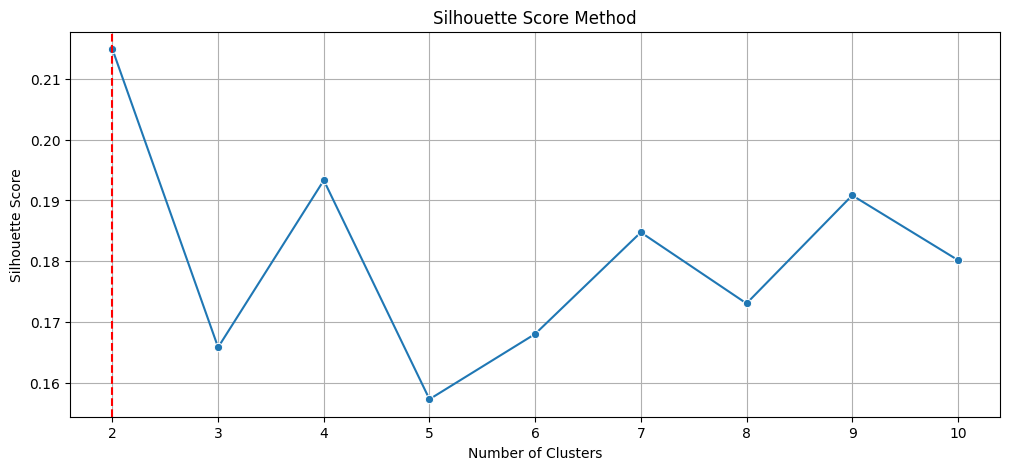

In [85]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(x=n_clusters, y=s_scores, marker='o', ax=ax)

ax.set_title("Silhouette Score Method")
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Silhouette Score")
ax.axvline(2, ls="--", c="red")  # v√≠ d·ª•: c·ª•m t·ªëi ∆∞u l√† 2
plt.grid()
plt.show()


In [86]:
clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.
for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(data_scaled)
    sil_score1= silhouette_score(data_scaled, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.2149434398130374
For n_clusters = 3 The average silhouette_score is : 0.16434387346759127
For n_clusters = 4 The average silhouette_score is : 0.17588648222043757
For n_clusters = 5 The average silhouette_score is : 0.1676643242231397
For n_clusters = 6 The average silhouette_score is : 0.16412765604593063
For n_clusters = 7 The average silhouette_score is : 0.1726007391975376
For n_clusters = 8 The average silhouette_score is : 0.1785517747140676
For n_clusters = 9 The average silhouette_score is : 0.18097270806585697


### Ph√¢n t√≠ch k·∫øt qu·∫£:
- qua ph∆∞∆°ng ph√°p Elbow v√† Silhouette Score cho th·∫•y c√≥ th·ªÉ ph√¢n 2,3 ho·∫∑c 4 c·ª•m ƒë·ªÅu ƒë∆∞·ª£c, sau ƒë√¢y ch√∫ng ta s·∫Ω ch·∫°y th·ª≠ v√† so s√°nh k·∫øt qu·∫£, ƒë·ªÉ l·∫•y ra s·ªë c·ª•m c·∫ßn chia t·ªët nh·∫•t.

### 3.3 Build KMeans Cluster algorithm using K=(2, 3, 4) and Standard Scaler Applied Dataset

In [87]:
model_kmeans2 = KMeans(n_clusters=2, random_state=0, init='k-means++')
model_kmeans3 = KMeans(n_clusters=3, random_state=0, init='k-means++')
model_kmeans4 = KMeans(n_clusters=4, random_state=0, init='k-means++')
y_predict_kmeans2 = model_kmeans2.fit_predict(data_scaled)
y_predict_kmeans3 = model_kmeans3.fit_predict(data_scaled)
y_predict_kmeans4 = model_kmeans4.fit_predict(data_scaled)

In [88]:
dftrain_clu2 = dftrain.copy(deep=True)
dftrain_clu3= dftrain.copy(deep=True)
dftrain_clu4= dftrain.copy(deep=True)
dftrain_clu2['Kmeans_Label'] = model_kmeans2.labels_
dftrain_clu3['Kmeans_Label'] = model_kmeans3.labels_
dftrain_clu4['Kmeans_Label'] = model_kmeans4.labels_
dftrain_clu2.head(10)

Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               99                           1            9   
1              4               82                           0            4   
2              8               51                           1            7   
3              5               52                           1            5   
4              7               75                           0            8   
5              3               78                           0            9   
6              7               73                           1            5   
7              8               45                           1            4   
8              5               77                           0            8   
9              4               89                           0            4   

   Sample Question Papers Practiced  Performance Index  Kmeans_Label  
0                                 1               91.0             1  
1                                 2               65.0             1  
2                                 2               45.0             0  
3                                 2               36.0             0  
4                                 5               66.0             1  
5                                 6               61.0             1  
6                                 6               63.0             1  
7                                 6               42.0             0  
8                                 2               61.0             1  
9                                 0               69.0             1

##### KMeans Cluster algorithm using K= 2

In [89]:

dftrain_clu2.groupby('Kmeans_Label').agg(['mean'])

Hours Studied Previous Scores Extracurricular Activities  \
                      mean            mean                       mean   
Kmeans_Label                                                            
0                 4.636544       54.886643                   0.495046   
1                 5.355874       84.275131                   0.494550   

             Sleep Hours Sample Question Papers Practiced Performance Index  
                    mean                             mean              mean  
Kmeans_Label                                                                 
0               6.484939                         4.494055         39.288545  
1               6.577109                         4.674203         71.457004

##### v·∫Ω bi·ªÉu ƒë·ªì ƒë·ªÉ ph√¢n t√≠ch s·ªë l∆∞·ª£ng m·ªói c·ª•m k= 2


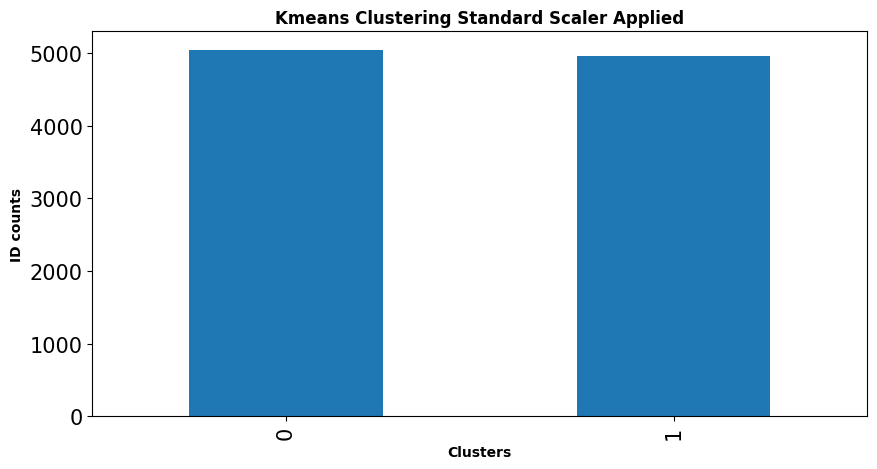

In [90]:
fig, ax = plt.subplots(figsize=(10,5))
dftrain_clu2.groupby(['Kmeans_Label']).count()['Previous Scores'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering Standard Scaler Applied',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='medium', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='medium', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

#### KMeans Cluster algorithm using K= 3

In [91]:
dftrain_clu3.groupby('Kmeans_Label').agg(['mean'])

Hours Studied Previous Scores Extracurricular Activities  \
                      mean            mean                       mean   
Kmeans_Label                                                            
0                 4.790132       52.637480                   0.491545   
1                 2.672231       82.664643                   0.481411   
2                 7.287824       81.823761                   0.510994   

             Sleep Hours Sample Question Papers Practiced Performance Index  
                    mean                             mean              mean  
Kmeans_Label                                                                 
0               6.470697                         4.513783         37.417188  
1               6.636950                         4.441578         62.108877  
2               6.523466                         4.804398         74.499180

##### v·∫Ω bi·ªÉu ƒë·ªì ƒë·ªÉ ph√¢n t√≠ch s·ªë l∆∞·ª£ng m·ªói c·ª•m k= 3


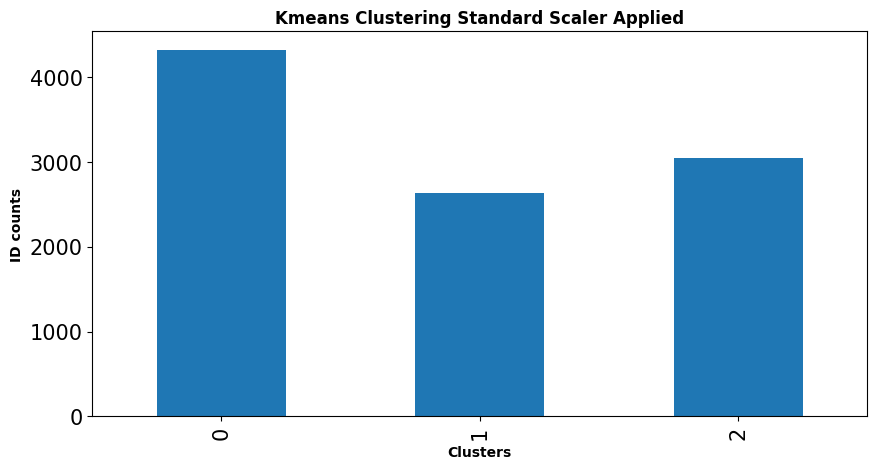

In [92]:
fig, ax = plt.subplots(figsize=(10,5))
dftrain_clu3.groupby(['Kmeans_Label']).count()['Previous Scores'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering Standard Scaler Applied',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='medium', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='medium', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

##### KMeans Cluster algorithm using K= 4

In [93]:
dftrain_clu4.groupby('Kmeans_Label').agg(['mean'])

Hours Studied Previous Scores Extracurricular Activities  \
                      mean            mean                       mean   
Kmeans_Label                                                            
0                 4.816451       55.109673                   0.000000   
1                 2.681465       85.873684                   0.461785   
2                 7.323462       84.100000                   0.519231   
3                 4.782155       55.405562                   1.000000   

             Sleep Hours Sample Question Papers Practiced Performance Index  
                    mean                             mean              mean  
Kmeans_Label                                                                 
0               6.494669                         4.441356         39.725438  
1               6.686499                         4.449428         65.444394  
2               6.487692                         4.863462         76.904615  
3               6.478563                         4.558903         40.548861

##### v·∫Ω bi·ªÉu ƒë·ªì ƒë·ªÉ ph√¢n t√≠ch s·ªë l∆∞·ª£ng m·ªói c·ª•m k= 4


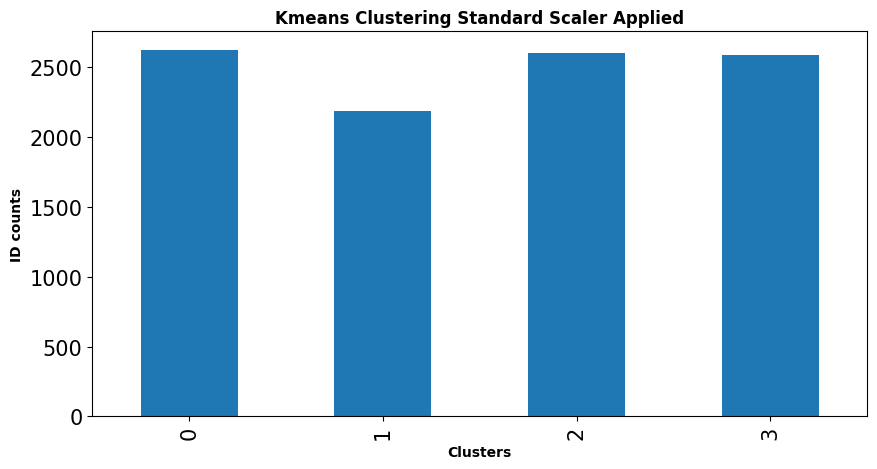

In [94]:
fig, ax = plt.subplots(figsize=(10,5))
dftrain_clu4.groupby(['Kmeans_Label']).count()['Previous Scores'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering Standard Scaler Applied',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='medium', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='medium', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

#### Ph√¢n t√≠ch v√† ƒë√°nh gi√° 
- Ph√¢n c·ª•m v·ªõi k = 2 n√≥ kh√¥ng ƒëem l·∫°i qu√° nhi·ªÅu gi√° tr·ªã cho ph√¢n t√≠ch, v√¨ c√°c ph√¢n t·ª≠ trong c·ª•m ƒëang c√≥ hi·ªán t∆∞·ª£ng ch·ªìng ch√©o l√™n nhau,
- Ph√¢n c·ª•m v·ªõi k = 3 n√≥ ƒë√£ kh·∫£ quan h∆°n, nh∆∞ng s·ªë l∆∞·ª£ng trong m·ªói c·ª•m l·ªách kh√° l·ªõn.
- Ph√¢n c·ª•m v·ªõi k = 4 ƒë√£ chia ra ph·∫ßn c·ª•m 0 c·ªßa k=3 cho n√™ s·ªë l∆∞·ª£ng ·ªü m·ªói c·ª•m ƒë·ªÅu nhau, v√† c√°c ch·ªâ s·ªë ·ªü m·ªói c·ª•m ƒëem l·∫°i kh√° nhi·ªÅu th√¥ng tin ƒë·ªÉ ph√¢n t√≠ch.
##### => ch·ªçn k=4 ƒë·ªÉ ph√¢n c·ª•m, ph√¢n t√≠ch v√† ƒë√°nh gi√°.


### 3.4 ƒê√°nh gi√° v√† ph√¢n t√≠ch k·∫øt qu·∫£ sau khi ph√¢n c·ª•m.


In [95]:
dftrain_clu4.groupby('Kmeans_Label').agg(['mean'])

Hours Studied Previous Scores Extracurricular Activities  \
                      mean            mean                       mean   
Kmeans_Label                                                            
0                 4.816451       55.109673                   0.000000   
1                 2.681465       85.873684                   0.461785   
2                 7.323462       84.100000                   0.519231   
3                 4.782155       55.405562                   1.000000   

             Sleep Hours Sample Question Papers Practiced Performance Index  
                    mean                             mean              mean  
Kmeans_Label                                                                 
0               6.494669                         4.441356         39.725438  
1               6.686499                         4.449428         65.444394  
2               6.487692                         4.863462         76.904615  
3               6.478563                         4.558903         40.548861

##### Tr·ª±c quan h√≥a c√°c c·ª•m ƒë√£ chia ƒë·ªÉ th·∫•y s·ª± ph√¢n b·ªë c·ªßa c√°c c·ª•m.

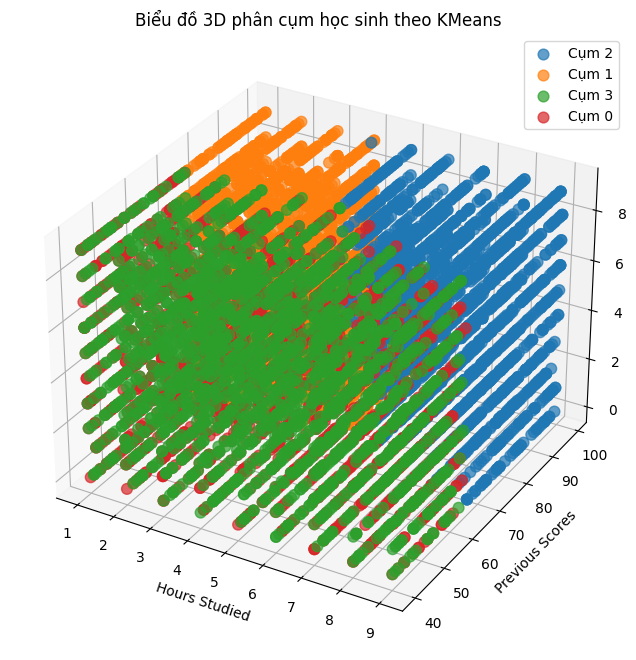

In [96]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

dftrain_clu = dftrain_clu4
# Thi·∫øt l·∫≠p b·∫£ng m√†u theo s·ªë c·ª•m
colors = sns.color_palette("Set2", dftrain_clu['Kmeans_Label'].nunique())

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# V·∫Ω t·ª´ng c·ª•m
for cluster in dftrain_clu['Kmeans_Label'].unique():
    subset = dftrain_clu[dftrain_clu['Kmeans_Label'] == cluster]
    ax.scatter(
        subset['Hours Studied'],
        subset['Previous Scores'],
        subset['Sample Question Papers Practiced'],
        label=f'C·ª•m {cluster}',
        s=60,
        alpha=0.7
    )

# G√°n nh√£n tr·ª•c v√† ti√™u ƒë·ªÅ
ax.set_xlabel('Hours Studied')
ax.set_ylabel('Previous Scores')
ax.set_zlabel('Performance Index')
ax.set_title('Bi·ªÉu ƒë·ªì 3D ph√¢n c·ª•m h·ªçc sinh theo KMeans')
ax.legend()
plt.show()


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


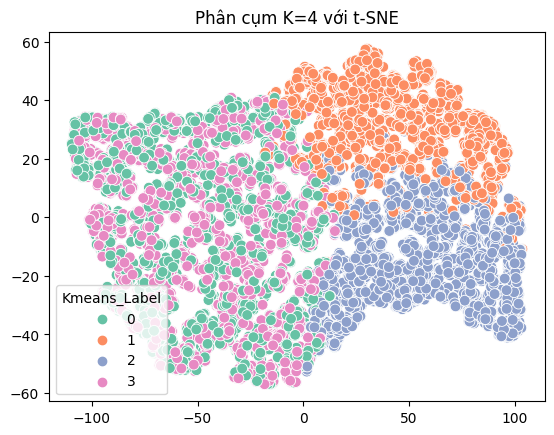

In [97]:
from sklearn.manifold import TSNE

X = dftrain_clu4.drop(columns='Kmeans_Label')
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X)

sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=dftrain_clu4['Kmeans_Label'], palette='Set2', s=60)
plt.title("Ph√¢n c·ª•m K=4 v·ªõi t-SNE")
plt.show()


##### ƒê√°nh gi√°: c√≥ th·ªÉ th·∫•y thu·∫≠t to√°n v√† d·ªØ li·ªáu ƒë√£ chia ra c√°c c·ª•m kh√° l√† ·ªïn ch√∫ng ta s·∫Ω ti·∫øn h√†nh ƒê√°nh gi√° v√† ph√¢n t√≠ch h√†nh vi h·ªçc t·∫≠p c·ªßa h·ªçc sinh d·ª±a tr√™n c√°c th√¥ng s·ªë c√°c c·ª•m ƒë√£ thu ƒë∆∞·ª£c.

### 3.5 ƒê√°nh gi√° v√† ph√¢n t√≠ch h√†nh vi h·ªçc t·∫≠p c·ªßa h·ªçc sinh d·ª±a tr√™n k·∫øt qu·∫£ ph√¢n c·ª•m thu ƒë∆∞·ª£c.

In [98]:
dftrain_clu4.groupby('Kmeans_Label').agg(['mean'])

Hours Studied Previous Scores Extracurricular Activities  \
                      mean            mean                       mean   
Kmeans_Label                                                            
0                 4.816451       55.109673                   0.000000   
1                 2.681465       85.873684                   0.461785   
2                 7.323462       84.100000                   0.519231   
3                 4.782155       55.405562                   1.000000   

             Sleep Hours Sample Question Papers Practiced Performance Index  
                    mean                             mean              mean  
Kmeans_Label                                                                 
0               6.494669                         4.441356         39.725438  
1               6.686499                         4.449428         65.444394  
2               6.487692                         4.863462         76.904615  
3               6.478563                         4.558903         40.548861

C·ª•m¬†0 ‚Äì ‚ÄúThi·∫øu ƒë·ªông l·ª±c h·ªçc t·∫≠p‚Äù
- ƒêi·ªÉm xu·∫•t ph√°t v√† th√†nh t√≠ch ƒë·ªÅu th·∫•p, nh∆∞ng th·ªùi gian h·ªçc ch·ªâ ·ªü m·ª©c trung b√¨nh.

- Kh√¥ng tham gia ngo·∫°i kho√° ‚Üí √≠t k·ªπ nƒÉng h·ªó tr·ª£ (qu·∫£n¬†l√≠ th·ªùi gian, h·ª£p t√°c‚Ä¶).
-   Khuy·∫øn ngh·ªã:

    + H·ªçc k√®m/mentoring ƒë·ªÉ l·∫•y l·∫°i ki·∫øn th·ª©c n·ªÅn.

    + L·ªô tr√¨nh h·ªçc c·ª• th·ªÉ, d√πng k·ªπ thu·∫≠t Pomodoro ƒë·ªÉ tƒÉng gi·ªù h·ªçc h·ªØu √≠ch.

    + B·ªï sung ho·∫°t ƒë·ªông nh√≥m nh·ªè (study‚Äëgroup) ƒë·ªÉ t·∫°o ƒë·ªông l·ª±c v√† tr√°ch nhi·ªám.

C·ª•m¬†1 ‚Äì ‚ÄúTh√¥ng minh nh∆∞ng thi·∫øu ƒë·∫ßu t∆∞‚Äù
- ƒêi·ªÉm tr∆∞·ªõc ƒë√¢y cao nh∆∞ng gi·ªù h·ªçc th·∫•p nh·∫•t. Th√†nh t√≠ch ch·ªâ ·ªü m·ª©c kh√°, ch·ª©ng t·ªè l·ªá thu·ªôc v√†o nƒÉng l·ª±c s·∫µn c√≥.

- Ngo·∫°i kho√° v·ª´a ph·∫£i ‚Üí ph√¢n t√°n th√™m qu·ªπ th·ªùi gian.
- Khuy·∫øn ngh·ªã:

    -   Coaching v·ªÅ m·ª•c ti√™u d√†i h·∫°n ƒë·ªÉ kh∆°i l·∫°i ƒë·ªông l·ª±c.

    -   Khuy·∫øn kh√≠ch gi·ªØ nh·ªãp ngo·∫°i kho√° nh∆∞ng ƒë·∫∑t gi·ªõi h·∫°n (gi·ªù h·ªçc t·ªëi thi·ªÉu / tu·∫ßn).

    -   n√™n d√†nh nhi·ªÅu th·ªùi d√†nh nhi·ªÅu th·ªùi gian h·ªçc ƒë·ªÉ ƒë·∫°t ƒëi·ªÉm s·ªë cao h∆°n.

C·ª•m¬†2 ‚Äì ‚ÄúH·ªçc¬†sinh xu·∫•t s·∫Øc, c√¢n b·∫±ng‚Äù
- Gi·ªù h·ªçc cao, ƒëi·ªÉm n·ªÅn cao, luy·ªán ƒë·ªÅ nhi·ªÅu nh·∫•t ‚Üí th√†nh t√≠ch cao nh·∫•t.

- V·∫´n d√†nh ‚âà¬†0,5 cho ngo·∫°i kho√° v√† ng·ªß ƒë·ªß ~6,5¬†h ‚Üí qu·∫£n¬†l√≠ th·ªùi gian t·ªët.
-   Khuy·∫øn ngh·ªã:

    - Ch∆∞∆°ng tr√¨nh n√¢ng cao (advanced¬†projects, Olympic, nghi√™n¬†c·ª©u khoa h·ªçc).

    - Trao vai tr√≤ d·∫´n d·∫Øt nh√≥m ho·∫∑c mentoring cho b·∫°n kh√°c (gi·ªØ ƒë·ªông l·ª±c, lan to·∫£ th·ª±c h√†nh t·ªët).

    - Theo d√µi ƒë·ªÉ tr√°nh ki·ªát s·ª©c; ƒë·∫£m b·∫£o duy tr√¨ ch·∫•t l∆∞·ª£ng gi·∫•c ng·ªß.

C·ª•m¬†3 ‚Äì ‚ÄúNƒÉng n·ªï ngo·∫°i kho√°, ƒëi·ªÉm th·∫•p‚Äù
- Tham gia ngo·∫°i kho√° tuy·ªát ƒë·ªëi (1,0) nh∆∞ng ƒëi·ªÉm & th√†nh t√≠ch th·∫•p t∆∞∆°ng t·ª± c·ª•m¬†0.

- Gi·ªù h·ªçc t∆∞∆°ng ƒë∆∞∆°ng c·ª•m¬†0, c√≥ th·ªÉ m·∫•t c√¢n ƒë·ªëi gi·ªØa ho·∫°t ƒë·ªông x√£ h·ªôi v√† h·ªçc thu·∫≠t.
- Khuy·∫øn ngh·ªã:

    - ƒê·ªãnh h∆∞·ªõng l·∫°i m·ª•c ti√™u: ph√¢n t√°ch r√µ th·ªùi gian h·ªçc vs ngo·∫°i kho√°.

    - C√≥ th·ªÉ d√†nh nhi·ªÅu th·ªùi gian h·ªçc h∆°n ƒë·ªÉ c·∫£i thi·ªán ƒëi·ªÉm s·ªë, hi·ªáu su·∫•t h·ªçc t·∫≠p.

    - T·∫≠n d·ª•ng k·ªπ nƒÉng ngo·∫°i kho√° (l√†m vi·ªác nh√≥m, l√£nh ƒë·∫°o) v√†o h·ªçc ‚Äì v√≠ d·ª• t·ªï ch·ª©c nh√≥m gi·∫£i ƒë·ªÅ.

### 4. S·ª≠a d·ª•ng DBSCAN ƒë·ªÉ ph√¢n c·ª•m.

#### 4.1 T√¨m c√°c ch·ªâ s·ªë c·∫ßn thi·∫øt ƒë·ªÉ ph√¢n c·ª•m b·∫±ng DBSCAN

In [99]:
from itertools import product
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
eps_values = np.arange(1.0, 5, 0.4)  # t·ª´ 1.0 ƒë·∫øn 3.0, b∆∞·ªõc 0.2
     # 1.0 ƒë·∫øn 2.5
min_samples = np.arange(3,22)              # 3 ƒë·∫øn 7

DBSCAN_params = list(product(eps_values, min_samples))

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

sil_score = []
no_of_clusters = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(data_scaled_std)
    labels = DBS_clustering.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    no_of_clusters.append(n_clusters)

    if n_clusters >= 2:
        score = silhouette_score(data_scaled_std[labels != -1], labels[labels != -1])
        sil_score.append(score)
    else:
        sil_score.append(None)
        print(f"‚ùå Kh√¥ng ƒë·ªß c·ª•m t·∫°i eps={p[0]}, min_samples={p[1]}")


‚ùå Kh√¥ng ƒë·ªß c·ª•m t·∫°i eps=2.1999999999999997, min_samples=3
‚ùå Kh√¥ng ƒë·ªß c·ª•m t·∫°i eps=2.1999999999999997, min_samples=4
‚ùå Kh√¥ng ƒë·ªß c·ª•m t·∫°i eps=2.1999999999999997, min_samples=5
‚ùå Kh√¥ng ƒë·ªß c·ª•m t·∫°i eps=2.1999999999999997, min_samples=6
‚ùå Kh√¥ng ƒë·ªß c·ª•m t·∫°i eps=2.1999999999999997, min_samples=7
‚ùå Kh√¥ng ƒë·ªß c·ª•m t·∫°i eps=2.1999999999999997, min_samples=8
‚ùå Kh√¥ng ƒë·ªß c·ª•m t·∫°i eps=2.1999999999999997, min_samples=9
‚ùå Kh√¥ng ƒë·ªß c·ª•m t·∫°i eps=2.1999999999999997, min_samples=10
‚ùå Kh√¥ng ƒë·ªß c·ª•m t·∫°i eps=2.1999999999999997, min_samples=11
‚ùå Kh√¥ng ƒë·ªß c·ª•m t·∫°i eps=2.1999999999999997, min_samples=12
‚ùå Kh√¥ng ƒë·ªß c·ª•m t·∫°i eps=2.1999999999999997, min_samples=13
‚ùå Kh√¥ng ƒë·ªß c·ª•m t·∫°i eps=2.1999999999999997, min_samples=14
‚ùå Kh√¥ng ƒë·ªß c·ª•m t·∫°i eps=2.1999999999999997, min_samples=15
‚ùå Kh√¥ng ƒë·ªß c·ª•m t·∫°i eps=2.1999999999999997, min_samples=16
‚ùå Kh√¥ng ƒë·ªß c·ª•m t·∫°i eps=2.1999999999999997, mi

A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.


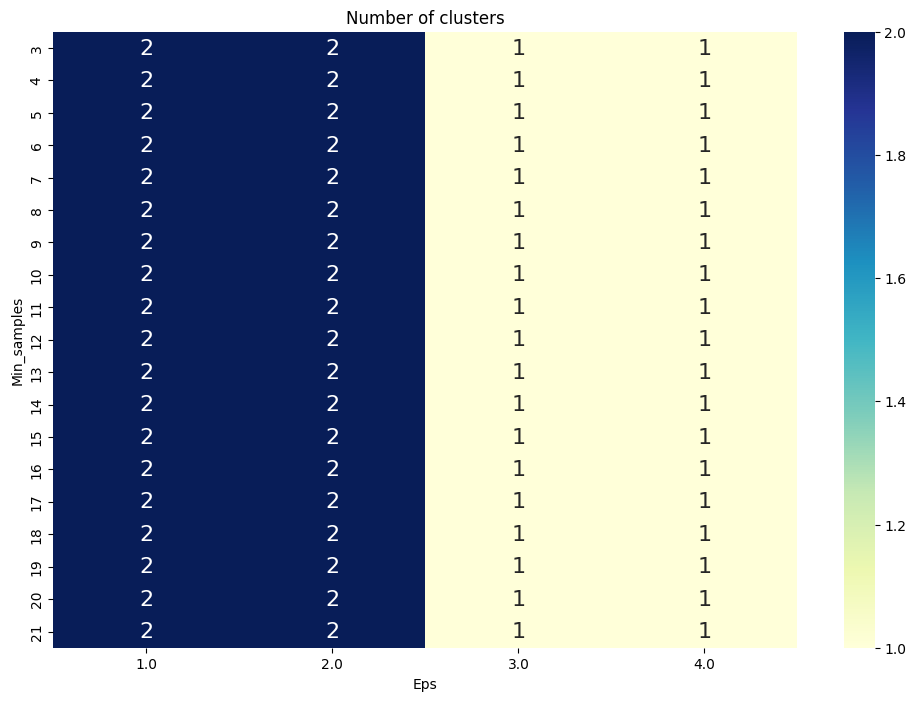

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

#### 4.2 Ti·∫øn h√†nh ph√¢n c·ª•m v·ªõi eps = 0.5 v√† min_samples = 4

In [ ]:
dbscan = DBSCAN(eps=0.25, min_samples=6)
dbscan.fit(data_scaled_std)

DBSCAN(eps=0.25, min_samples=6)

In [ ]:
dftrain_DBSCAN = dftrain.copy(deep = True)
dftrain_DBSCAN['DBSCAN_Labels'] = dbscan.labels_
dftrain_DBSCAN.head()

Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               99                           1            9   
1              4               82                           0            4   
2              8               51                           1            7   
3              5               52                           1            5   
4              7               75                           0            8   

   Sample Question Papers Practiced  Performance Index  DBSCAN_Labels  
0                                 1               91.0             -1  
1                                 2               65.0             -1  
2                                 2               45.0             -1  
3                                 2               36.0             -1  
4                                 5               66.0             -1

In [ ]:
dftrain_DBSCAN.groupby('DBSCAN_Labels').agg(['mean'])

Hours Studied Previous Scores Extracurricular Activities  \
                       mean            mean                       mean   
DBSCAN_Labels                                                            
-1                 4.989534       69.430814                   0.494214   
 0                 7.000000       62.166667                   1.000000   
 1                 3.000000       94.333333                   1.000000   
 2                 2.000000       61.714286                   1.000000   
 3                 8.000000       58.142857                   0.000000   
 4                 5.000000       60.833333                   0.000000   
 5                 8.000000       97.333333                   0.000000   
 6                 8.000000       57.571429                   0.000000   
 7                 6.000000       81.833333                   1.000000   
 8                 1.000000       56.166667                   1.000000   
 9                 7.000000       94.166667                   1.000000   

              Sleep Hours Sample Question Papers Practiced Performance Index  
                     mean                             mean              mean  
DBSCAN_Labels                                                                 
-1                6.53014                         4.580859         55.198249  
 0                4.00000                         7.000000         55.166667  
 1                7.00000                         1.000000         73.500000  
 2                9.00000                         4.000000         39.428571  
 3                6.00000                         6.000000         52.142857  
 4                8.00000                         8.000000         47.833333  
 5                9.00000                         6.000000         95.333333  
 6                5.00000                         3.000000         50.428571  
 7                4.00000                         7.000000         70.000000  
 8                8.00000                         5.000000         31.333333  
 9                6.00000                         3.000000         85.000000

#### 4.3 ki·ªÉm tra ph√¢n b·ªë c·ªßa c√°c c·ª•m

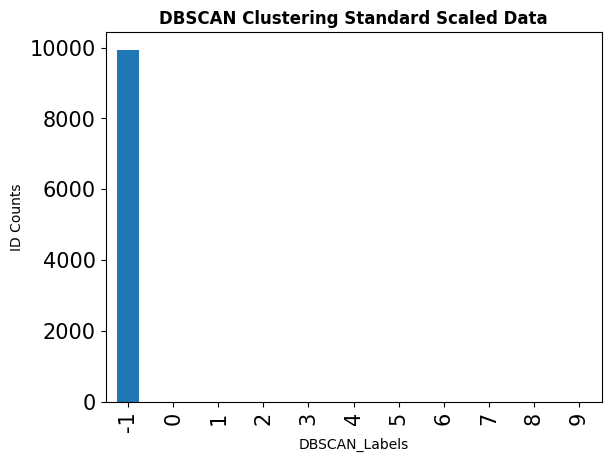

In [ ]:
dftrain_DBSCAN.groupby(['DBSCAN_Labels']).count()['Hours Studied'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering Standard Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

#### 4.3 T√≠nh silhouette score

In [ ]:
from sklearn.metrics import silhouette_score

# L·∫•y nh√£n c·ª•m t·ª´ k·∫øt qu·∫£ DBSCAN b·∫°n ƒë√£ l∆∞u
labels = dftrain_DBSCAN['DBSCAN_Labels'].values

# Lo·∫°i b·ªè ƒëi·ªÉm nhi·ªÖu (-1), v√¨ silhouette kh√¥ng h·ªó tr·ª£
mask = labels != -1

# Ki·ªÉm tra c√≥ ƒë·ªß c·ª•m ƒë·ªÉ t√≠nh hay kh√¥ng
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

if n_clusters >= 2:
    sil_score = silhouette_score(data_scaled_std[mask], labels[mask])
    print(f"‚úÖ Silhouette Score: {sil_score:.4f}")
else:
    print("‚ùå Kh√¥ng ƒë·ªß c·ª•m h·ª£p l·ªá ƒë·ªÉ t√≠nh Silhouette Score.")


‚úÖ Silhouette Score: 0.8540


#### 4.4 Tr·ª±c quan h√≥a

C:\Users\Admin\AppData\Local\Temp\ipykernel_17684\1748933362.py:27: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


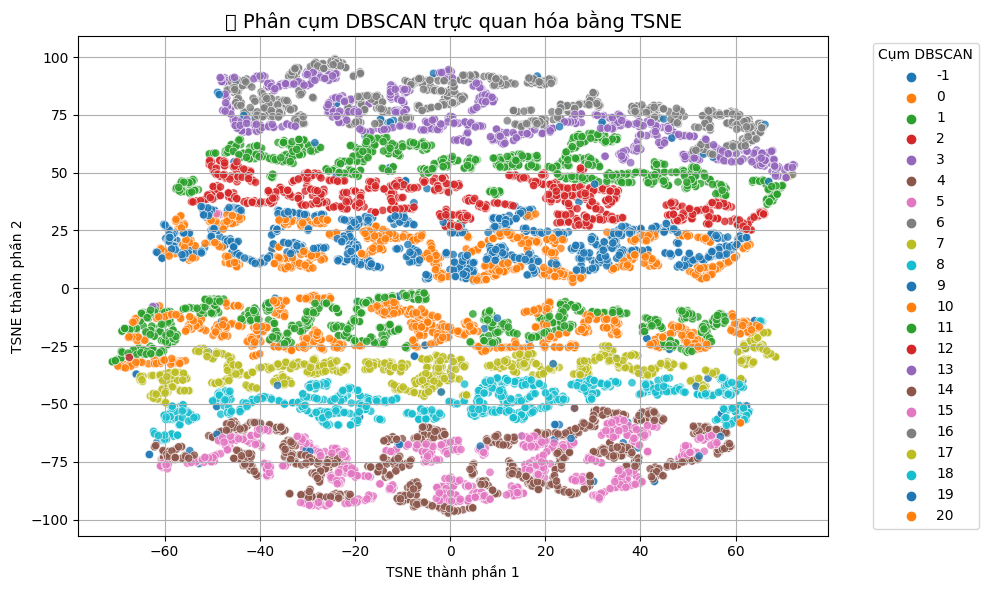

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# TSNE ƒë·ªÉ gi·∫£m chi·ªÅu d·ªØ li·ªáu chu·∫©n h√≥a
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate='auto', init='pca')
tsne_result = tsne.fit_transform(data_scaled_std)

# Th√™m k·∫øt qu·∫£ TSNE v√†o DataFrame
dftrain_DBSCAN['TSNE_1'] = tsne_result[:, 0]
dftrain_DBSCAN['TSNE_2'] = tsne_result[:, 1]

# V·∫Ω scatter plot c√°c c·ª•m
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=dftrain_DBSCAN,
    x='TSNE_1', y='TSNE_2',
    hue='DBSCAN_Labels',
    palette='tab10',
    alpha=0.8
)
plt.title('üîç Ph√¢n c·ª•m DBSCAN tr·ª±c quan h√≥a b·∫±ng TSNE', fontsize=14)
plt.xlabel('TSNE th√†nh ph·∫ßn 1')
plt.ylabel('TSNE th√†nh ph·∫ßn 2')
plt.legend(title='C·ª•m DBSCAN', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 4.5 Ph√¢n t√≠ch v√† ƒë√°nh gi√° m√¥ h√¨nh.
- m√¥ h√¨nh ƒëem l·∫°i ch·ªâ s·ªë ƒë√°nh gi√° ch·∫•t l∆∞·ª£ng ph√¢n c·ª•m kh√° th·∫•p (Silhouette Score) v·ªõi -0.1203 th·∫•p h∆°n v·ªõi thu·∫≠t to√°n Kmean,
v√† theo m√¥ h√¨nh tr·ª±c quan h√≥a th√¨ ch·∫•t l∆∞·ª£ng chia th·ª±c s·ª± kh√¥ng ph√π h·ª£p.
=> n√™n m√¥ h√¨nh n√†y kh√¥ng hi·ªáu qu·∫£ cho vi·ªác ph√¢n c·ª•m v·ªõi b·ªô d·ªØ li·ªáu n√†y.